In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
eeg = pd.read_csv('Stratified_EEG_data.csv')
eeg.head()

,subject ID,Video ID,Attention,Meditation,Raw,Delta,Theta,Alpha 1,Alpha 2,Beta 1,Beta 2,Gamma1,Gamma2,predefined label,Self-defined label,age,ethnicity,gender
0,0,0,56,43,278,301963,90612,33735,23991,27946,45097,33228,8293,0,0,25,Han Chinese,M
1,0,0,40,35,-50,73787,28083,1439,2240,2746,3687,5293,2740,0,0,25,Han Chinese,M
2,0,0,47,48,101,758353,383745,201999,62107,36293,130536,57243,25354,0,0,25,Han Chinese,M
3,0,0,47,57,-5,2012240,129350,61236,17084,11488,62462,49960,33932,0,0,25,Han Chinese,M
4,0,0,44,53,-8,1005145,354328,37102,88881,45307,99603,44790,29749,0,0,25,Han Chinese,M


Put column names in consistent format:

In [3]:
renamed = []

for col in list(eeg.columns):
    newval = col.lower().replace(' ', '')
    renamed.append(newval)  

eeg.columns = renamed
eeg.head()

,subjectid,videoid,attention,meditation,raw,delta,theta,alpha1,alpha2,beta1,beta2,gamma1,gamma2,predefinedlabel,self-definedlabel,age,ethnicity,gender
0,0,0,56,43,278,301963,90612,33735,23991,27946,45097,33228,8293,0,0,25,Han Chinese,M
1,0,0,40,35,-50,73787,28083,1439,2240,2746,3687,5293,2740,0,0,25,Han Chinese,M
2,0,0,47,48,101,758353,383745,201999,62107,36293,130536,57243,25354,0,0,25,Han Chinese,M
3,0,0,47,57,-5,2012240,129350,61236,17084,11488,62462,49960,33932,0,0,25,Han Chinese,M
4,0,0,44,53,-8,1005145,354328,37102,88881,45307,99603,44790,29749,0,0,25,Han Chinese,M


In [4]:
# id columns:
idcols = ['subjectid', 'videoid']

# numeric columns:
numcols = ['attention', 'meditation', 'raw', 'delta', 'theta', 'alpha1', 
           'alpha2', 'beta1', 'beta2', 'gamma1', 'gamma2', 'age']
# categorical columns:
catcols = ['ethnicity', 'gender']
# target predictor columns:
targetcols = ['predefinedlabel', 'self-definedlabel']

# set dummies on categorical columns:
catdummies = pd.get_dummies(eeg[catcols])

# convert eeg data to standard spreadsheet format:
finaldata = pd.concat([eeg[idcols], eeg[numcols], catdummies, eeg[targetcols]], axis = 1)

# save dataset:
finaldata.to_csv('eeg_standardspreadsheet.csv')

## Look at distributions of numeric colums:

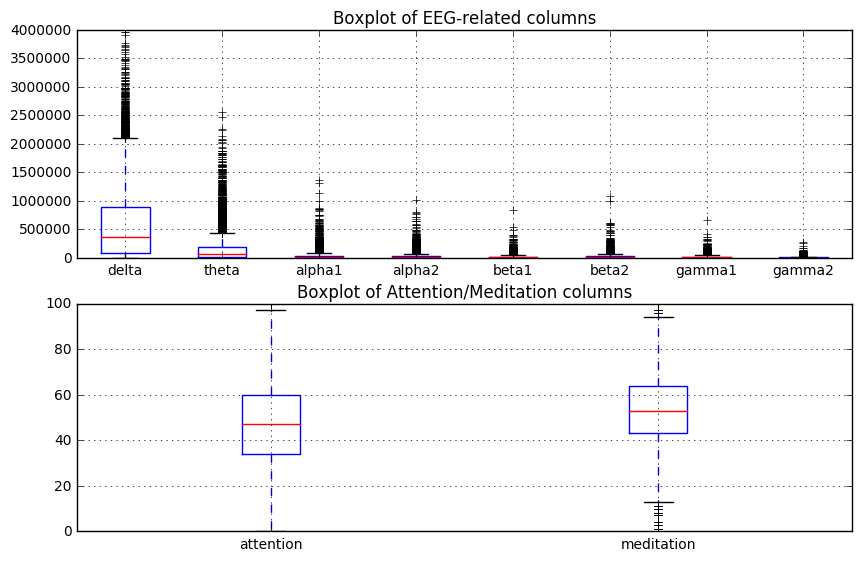

In [6]:
# all numeric columns other than attention, meditation, age:
eegcols = [col for col in numcols if col not in ['attention', 'meditation', 'raw', 'age']]
amcols = ['attention', 'meditation']

fig = plt.figure(figsize = (10, 10))

plt.subplot(311)
finaldata[eegcols].boxplot(return_type = 'axes')
plt.title('Boxplot of EEG-related columns')

plt.subplot(312)
finaldata[amcols].boxplot(return_type = 'axes')
plt.title('Boxplot of Attention/Meditation columns')


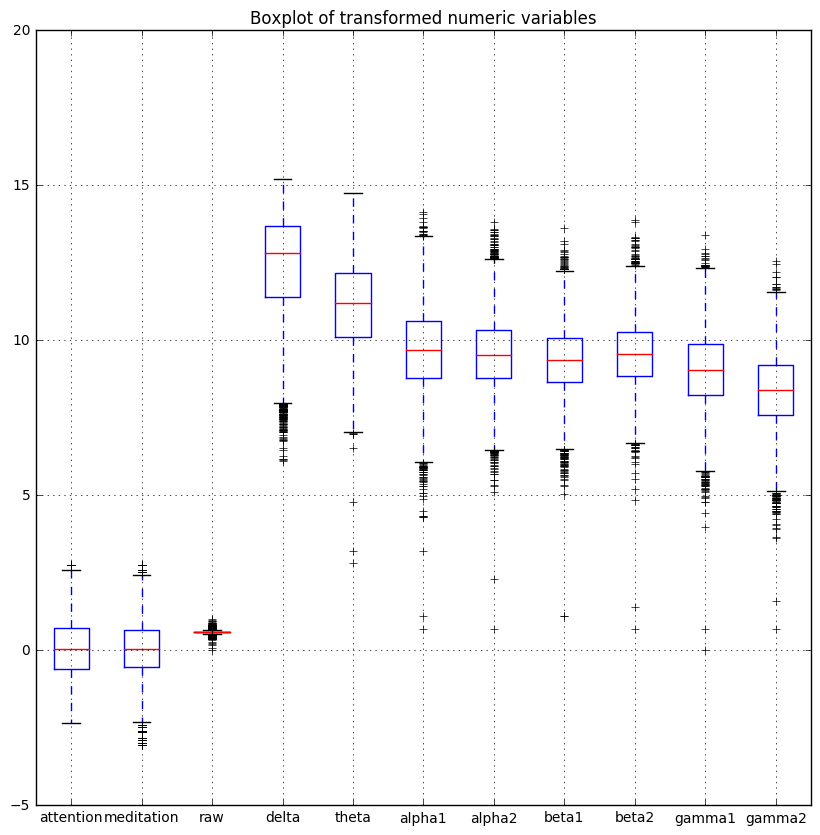

In [37]:
# log transform skewed columns:
eeg_logtransform = finaldata[eegcols].apply(np.log, axis = 1)

# z scores for relatively normal columns:
attention_z = pd.DataFrame(stats.zscore(finaldata[['attention']]))
meditation_z = pd.DataFrame(stats.zscore(finaldata[['meditation']]))

att_med_zscores = pd.concat([attention_z, meditation_z], axis = 1)
att_med_zscores.columns = ['attention', 'meditation']

# min max transform for raw column:
raw_mm = (finaldata[['raw']] - finaldata[['raw']].min()) / (finaldata[['raw']].max() - finaldata[['raw']].min())

# concatenate transformed columns:
numcols_final = pd.concat([att_med_zscores, raw_mm, eeg_logtransform], axis = 1)

fig = plt.figure(figsize = (10, 10))
# display the results:
numcols_final.boxplot(return_type = 'axes')
plt.title('Boxplot of transformed numeric variables')

Looks like we still have some issues with the variables being on different scaless and with outliers.

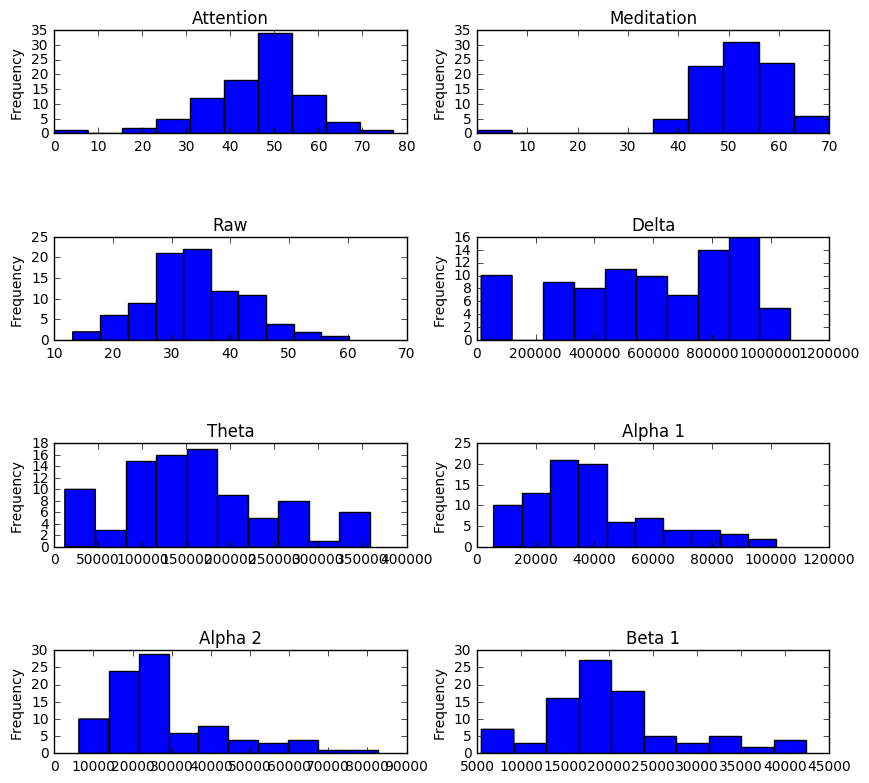

In [98]:
subvid = finaldata.groupby(['subject ID', 'Video ID']).mean()

numcols = ['Attention', 'Meditation', 'Raw', 'Delta', 'Theta', 'Alpha 1', 'Alpha 2', 'Beta 1', 'Beta 2', 'Gamma1', 'Gamma2']

fig = plt.figure(figsize = (10, 20))
fig.subplots_adjust(hspace=1.0)

plt.subplot(821)
subvid['Attention'].plot(kind = 'hist')
plt.title('Attention')

plt.subplot(822)
subvid['Meditation'].plot(kind = 'hist')
plt.title('Meditation')

plt.subplot(823)
subvid['Raw'].plot(kind = 'hist')
plt.title('Raw')

plt.subplot(824)
subvid['Delta'].plot(kind = 'hist')
plt.title('Delta')

plt.subplot(825)
subvid['Theta'].plot(kind = 'hist')
plt.title('Theta')

plt.subplot(826)
subvid['Alpha 1'].plot(kind = 'hist')
plt.title('Alpha 1')

plt.subplot(827)
subvid['Alpha 2'].plot(kind = 'hist')
plt.title('Alpha 2')

plt.subplot(828)
subvid['Beta 1'].plot(kind = 'hist')
plt.title('Beta 1')


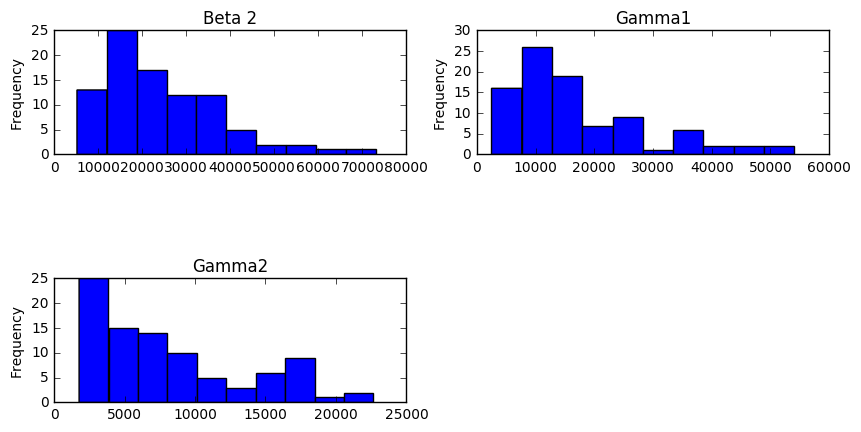

In [102]:
fig = plt.figure(figsize = (10, 8))
fig.subplots_adjust(hspace=1.0)

plt.subplot(321)
subvid['Beta 2'].plot(kind = 'hist')
plt.title('Beta 2')

plt.subplot(322)
subvid['Gamma1'].plot(kind = 'hist')
plt.title('Gamma1')

plt.subplot(323)
subvid['Gamma2'].plot(kind = 'hist')
plt.title('Gamma2')

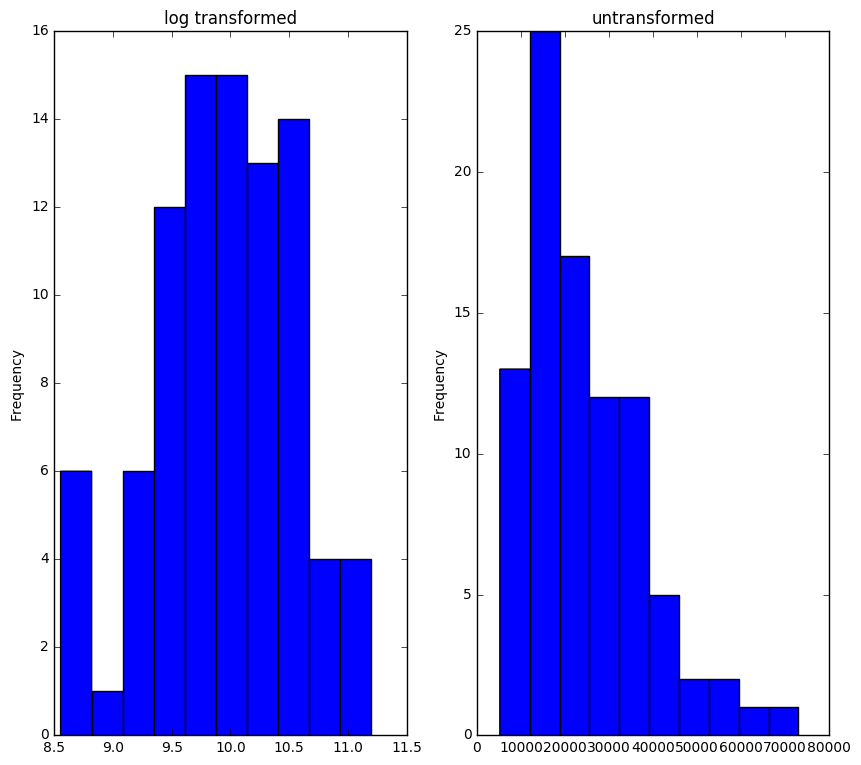

In [136]:
# create zscores for features that appear normally distributed:
scoredata = subvid[['Attention', 'Meditation', 'Raw']].apply(stats.zscore, axis=1)
scoredata.rename(columns={'Attention' : 'Attention_z', 'Mediation' : 'Meditation_z', 'Raw' : 'Raw_z'}, inplace=True)

# min max normalization for Delta variable (faily uniform)
minmaxdata = (subvid['Delta'] - subvid['Delta'].min()) / (subvid['Delta'].max() - subvid['Delta'].min())
minmaxdata = pd.DataFrame(minmaxdata)
minmaxdata.columns = ['Delta_mm']

# log transform on skewed columns
logdata = subvid[['Theta', 'Alpha 1', 'Alpha 2', 'Beta 1', 'Beta 2', 'Gamma1', 'Gamma2']].copy()
logdata.rename(columns = {'Theta' : 'Theta_log', 
                           'Alpha 1' : 'Alpha1_log', 
                           'Alpha 2' : 'Alpha2_log', 
                           'Beta 1' : 'Beta1_log', 
                           'Beta 2' : 'Beta2_log', 
                           'Gamma1' : 'Gamma1_log', 
                           'Gamma2' : 'Gamma2_log'}, 
                inplace = True)

logdata = logdata.apply(np.log, axis = 1)

nums_final = pd.concat([scoredata, minmaxdata, logdata], axis = 1)
nums_final.corr()


fig = plt.figure(figsize = (10, 20))

plt.subplot(221)
nums_final['Beta2_log'].plot(kind='hist')
plt.title('log transformed')

plt.subplot(222)
subvid['Beta 2'].plot(kind='hist')
plt.title('untransformed')


